### Example Learning Curve


Eample taken from: 

* Raschka and Mirjalili. *Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow, (2nd ed)}*. Packt Publishing, 2017.

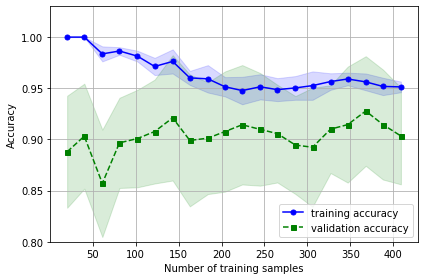

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

bc=datasets.load_breast_cancer()

X = bc.data
y = bc.target

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y)


clf = LogisticRegression(solver = 'liblinear', random_state=1)
clf = treeLearner = tree.DecisionTreeClassifier(max_depth=2)
pipe_lr = make_pipeline(StandardScaler(), clf)

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.05, 1.0, 20),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
#plt.savefig('images/06_05.png', dpi=300)
plt.show()

### Experimenting with Bagging and Variance

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
import sklearn.metrics as metrics
treeLearner = tree.DecisionTreeClassifier()

variance = []
for n_est in range(5,30,2):
    import time
    start = time.time()
    results = []
    for n in range(30):
        clf = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(), 
                                n_estimators=n_est, 
                                max_samples=1.0, 
                                max_features=1.0)
        clf.fit(X_train, y_train)                         
        predicted= np.array(clf.predict(X_test))
        res = metrics.accuracy_score(predicted,y_test)
        results.append(res)
    end = time.time()
    variance.append(np.var(results))
    print(f"\nMean:{np.mean(results)} VAR:{np.var(results)} TIME:{end-start}")   



Mean:0.9561403508771927 VAR:0.00022058069149481907 TIME:0.6030173301696777

Mean:0.9576023391812863 VAR:0.00010302315242296808 TIME:0.861008882522583

Mean:0.9596491228070173 VAR:0.00021852877808556514 TIME:1.1457371711730957

Mean:0.9605263157894736 VAR:0.00017313019390581726 TIME:1.4519093036651611

Mean:0.9616959064327484 VAR:0.00013585376697103387 TIME:1.677262783050537

Mean:0.9611111111111109 VAR:0.00014713929072193157 TIME:1.9675159454345703

Mean:0.9619883040935672 VAR:0.00016073321705824034 TIME:2.090688467025757

Mean:0.9614035087719296 VAR:0.00010567354057658785 TIME:2.398036479949951

Mean:0.9643274853801168 VAR:0.00012790260251017437 TIME:2.511427402496338

Mean:0.9643274853801169 VAR:0.00012277281898703894 TIME:2.68782114982605

Mean:0.9643274853801167 VAR:0.00010738346841763295 TIME:2.9478719234466553

Mean:0.9625730994152044 VAR:0.00010738346841763316 TIME:3.171565532684326

Mean:0.9637426900584793 VAR:0.00010122772818987073 TIME:3.378197193145752


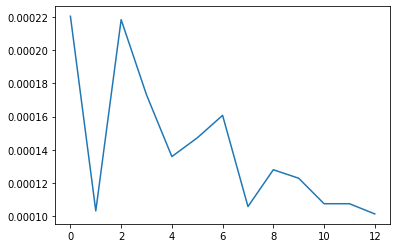

In [3]:
plt.plot(variance)